# **Importing and reading the file**




In [ ]:
import re
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from decimal import Decimal
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# download necessary NLTK corpora and packages
nltk.download('stopwords')
nltk.download('punkt')

# getting the data
df = pd.read_csv("/content/training.csv", encoding="ISO-8859-1")

stemmer = LancasterStemmer()
vectorizer = CountVectorizer()

texts = []
labels = []


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **(Experiment 1) Test sizes**

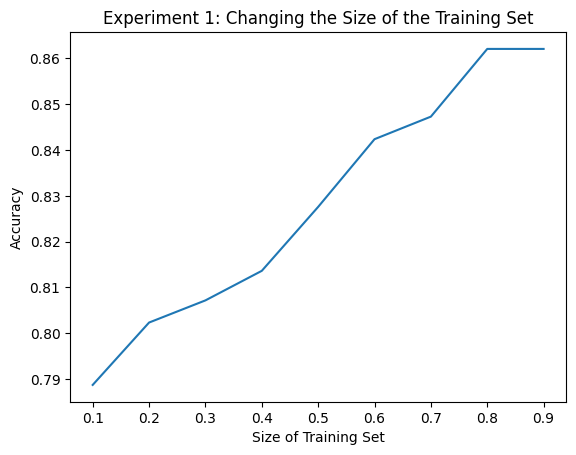

In [ ]:
# preprocess each text and its corresponding label
for index, row in df.iterrows():
    text = row["text"]
    label = row["sentiment"]
    
    text = re.sub(r"http\S+|@\S+", "", text)
    
    tokens = nltk.word_tokenize(text)

    tokens = [token for token in tokens if token.isalpha()]
    stemmed_tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stopwords.words('english')]

    preprocessed_text = " ".join(stemmed_tokens)
    
    texts.append(preprocessed_text)
    labels.append(label)

# split the dataset into training and testing sets
train_size = 0.6
test_size = 1 - train_size
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=test_size, random_state=42)

# create lists to store the accuracies and sizes of the training set
accuracies = []
train_sizes = []

# perform Experiment 
for i in range(1, 10):

    train_size = i * 0.1
  
    test_size = 1 - train_size
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=test_size, random_state=42)

    X_train_vectorized = vectorizer.fit_transform(X_train)

    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_vectorized, y_train)

    X_test_vectorized = vectorizer.transform(X_test)
    
    y_pred = nb_classifier.predict(X_test_vectorized)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    train_sizes.append(train_size)

plt.plot(train_sizes, accuracies)
plt.xlabel("Size of Training Set")
plt.ylabel("Accuracy")
plt.title("Experiment 1: Changing the Size of the Training Set")
plt.show()


# **(Experiment 2) Frequency of words**

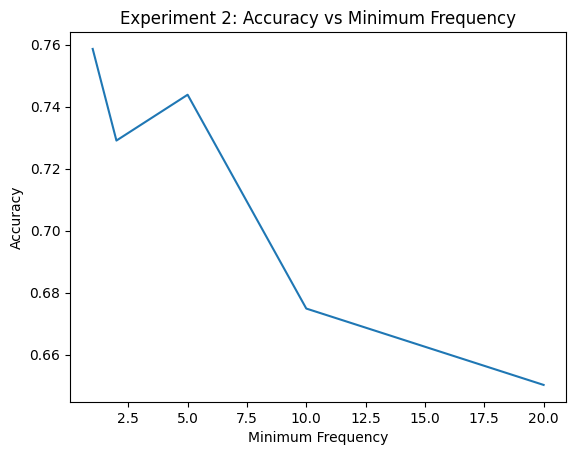

In [ ]:
# Define the minimum frequency of words
min_freqs = [1, 2, 5, 10, 20]

# Define a list to store the accuracy scores for each minimum frequency
accuracy_scores = []

# Loop through each minimum frequency
for min_freq in min_freqs:

    # Preprocess the texts
    texts = []
    labels = []
    for i in range(len(df)):
        text = df.loc[i, "text"]
        label = df.loc[i, "sentiment"]

        text = re.sub(r"http\S+|www\S+|\@\w+|\d+|[^\w\s]", "", text)

        tokens = nltk.word_tokenize(text)

        stemmed_tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words]

        preprocessed_text = " ".join(stemmed_tokens)
        texts.append(preprocessed_text)
        labels.append(label)

    # Vectorize the texts
    vectorizer = CountVectorizer(min_df=min_freq)
    X = vectorizer.fit_transform(texts)
    y = np.array(labels)

    # Split the dataset
    train_size = 0.8
    test_size = 1 - train_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train the Naive Bayes classifier
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    accuracy_scores.append(accuracy)

plt.plot(min_freqs, accuracy_scores)
plt.xlabel('Minimum Frequency')
plt.ylabel('Accuracy')
plt.title('Experiment 2: Accuracy vs Minimum Frequency')
plt.show()

# **(Experiment 3) Estimators**

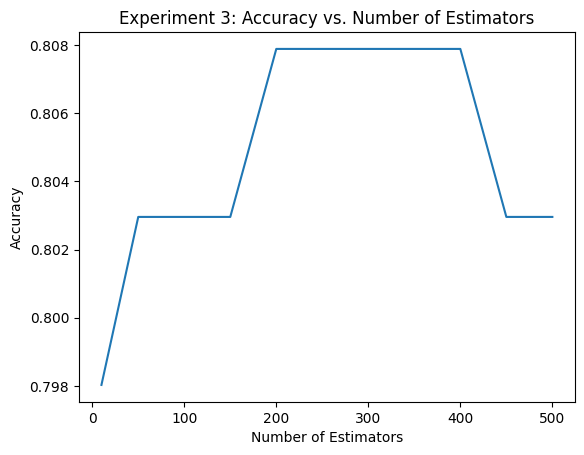

In [ ]:


def preprocess_text(text):

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    words = word_tokenize(text)

    words = [word for word in words if word not in stop_words]

    words = [stemmer.stem(word) for word in words]

    text = ' '.join(words)
    return text

df['text'] = df['text'].apply(preprocess_text)

# split the data into training and testing sets
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=test_size, random_state=42)

# vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Experiment: Changing the number of estimators for Random Forest classifier

estimators = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accuracies = []

for n in estimators:
    # train the model
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


plt.plot(estimators, accuracies)
plt.title('Experiment 3: Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

# **(Experiment 4) Kernel functions**

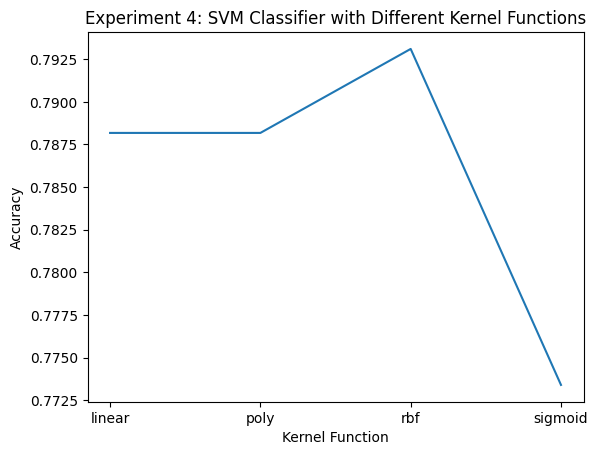

In [26]:

df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+", "", x))
df['text'] = df['text'].apply(lambda x: re.sub(r"RT ", "", x))
df['text'] = df['text'].apply(lambda x: re.sub(r"@\S+", "", x))

translator = str.maketrans('', '', string.punctuation)
df['text'] = df['text'].apply(lambda x: x.translate(translator).lower())

df['text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x if word not in stop_words])

df['text'] = df['text'].apply(lambda x: ' '.join(x))

# split the df into features and labels
texts = df['text']
labels = df['sentiment']

# vectorize the features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# split the data into training and testing sets
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=test_size, random_state=42)

# perform SVM classification using different kernel functions
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(kernels, accuracies)
plt.title('Experiment 4: SVM Classifier with Different Kernel Functions')
plt.xlabel('Kernel Function')
plt.ylabel('Accuracy')
plt.show()

# **Training the data and labeling it into data.csv**

In [ ]:
import re
import string
from decimal import Decimal
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import math
from nltk.stem.lancaster import LancasterStemmer

# Load the training data
train_data = pd.read_csv('/content/training.csv')

# Clean and preprocess the training data
def preprocess_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    stemmer = LancasterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

train_data['text'] = train_data['text'].apply(preprocess_text)

# Split the training data into features and labels
X_train = train_data['text']
y_train = train_data['sentiment']

# Load the unlabeled data
unlabeled_data = pd.read_csv('/content/data.csv')

# Clean and preprocess the unlabeled data
unlabeled_data['text'] = unlabeled_data['text'].apply(preprocess_text)

# Load the Random Forest classifier and train it on the training data
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_unlabeled = vectorizer.transform(unlabeled_data['text'])

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Predict the labels for the unlabeled data
labeled_data = pd.DataFrame(columns=['text', 'sentiment'])
for i, row in unlabeled_data.iterrows():
    text = row['text']
    X_test = X_unlabeled[i]
    predicted_label = rfc.predict(X_test)
    labeled_data = labeled_data.append({'text': text, 'sentiment': predicted_label[0]}, ignore_index=True)

# Save data to a new file
labeled_data.to_csv('labeled_data.csv', index=False)



<ipython-input-22-780b7b3b1b0a>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeled_data = labeled_data.append({'text': text, 'sentiment': predicted_label[0]}, ignore_index=True)
<ipython-input-22-780b7b3b1b0a>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeled_data = labeled_data.append({'text': text, 'sentiment': predicted_label[0]}, ignore_index=True)
<ipython-input-22-780b7b3b1b0a>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeled_data = labeled_data.append({'text': text, 'sentiment': predicted_label[0]}, ignore_index=True)
<ipython-input-22-780b7b3b1b0a>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeled

# **The standart basic test**

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from decimal import Decimal
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# load stop words
stop_words = set(stopwords.words('english'))

# initialize stemmer
stemmer = LancasterStemmer()

# load training data
train_data = pd.read_csv('/content/training.csv')

# preprocess the training data
def preprocess(text):
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    tokens = text.split()

    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    text = ' '.join(tokens)
    
    return text

# preprocess the training data
train_data['text'] = train_data['text'].apply(preprocess)

# vectorize the training data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['sentiment']

# train the model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)

# print the accuracy
print('Accuracy:', accuracy)


Accuracy: 0.8019704433497536
